In [1]:
from sklearn.datasets import make_classification
import numpy as np
x,y=make_classification(n_samples=100,n_features=2,n_informative=1,n_redundant=0,n_classes=2, n_clusters_per_class=1,random_state=41,hypercube=False,class_sep=10)

In [2]:
import pandas as pd
df=pd.DataFrame(x, columns=["feature1","feature2"])
df["Target"]=y
print(df.head())

   feature1  feature2  Target
0  0.199247 -0.116976       1
1 -0.248820 -0.731152       1
2 -0.354490 -0.708106       1
3 -1.590865 -2.011992       0
4 -0.200840  1.634932       1


In [3]:
import matplotlib.pyplot as plt

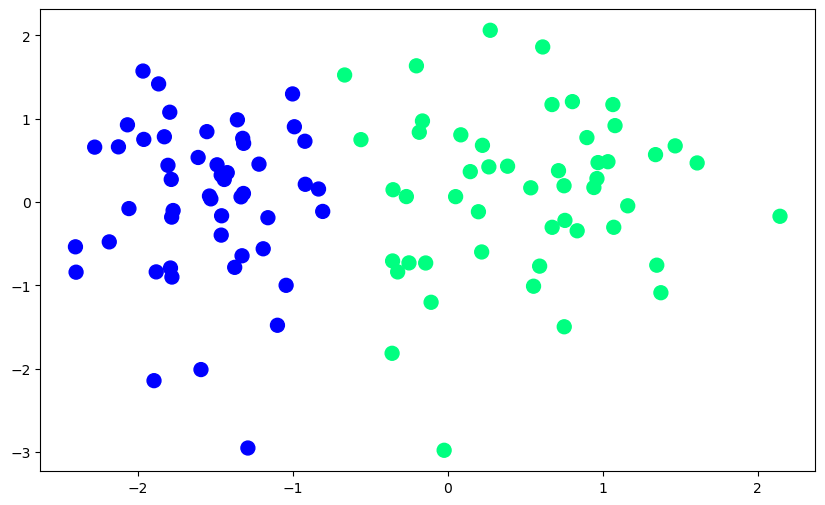

In [4]:
plt.figure(figsize=(10,6))
plt.scatter(x[:,0],x[:,1],c=y,cmap='winter',s=100)

In [5]:
def preceptron(x,y):
    x=np.insert(x,0,1,axis=1)
    weights=np.ones(x.shape[1])
    lr=0.1

    for i in range(1000):
        j=np.random.randint(0,100)
        y_hat=step(np.dot(x[j],weights))
        weights=weights+lr*(y[j]-y_hat)*x[j]

    return weights[0],weights[1:]
    

In [6]:
def step(z):
    return 1 if z>0 else 0

In [7]:
intercept_,coef_=preceptron(x,y)

In [9]:
print(coef_)
print(intercept_)

[1.28620427 0.16249136]
0.9


In [15]:
m=-(coef_[0]/coef_[1])
b=-(intercept_/coef_[1])

In [16]:
x_input=np.linspace(-3,3,100)
y_input=m*x_input+b

(-3.0, 2.0)

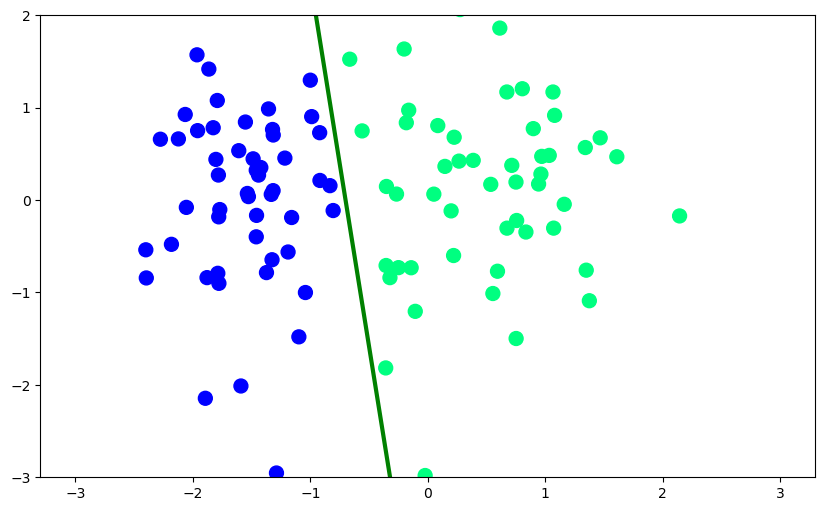

In [20]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='green',linewidth=3)
plt.scatter(x[:,0],x[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

In [21]:
def perceptron(X,y):

    m = []
    b = []

    x = np.insert(x,0,1,axis=1)
    weights = np.ones(x.shape[1])
    lr = 0.1

    for i in range(200):
        j = np.random.randint(0,100)
        y_hat = step(np.dot(x[j],weights))
        weights = weights + lr*(y[j]-y_hat)*x[j]

        m.append(-(weights[1]/weights[2]))
        b.append(-(weights[0]/weights[2]))

    return m,b

In [28]:
m,b=perceptron(x,y)

%matplotlib notebook
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation

In [30]:
from IPython.display import HTML
HTML(anim.to_jshtml())

fig, ax = plt.subplots(figsize=(9,5))

x_i = np.arange(-3, 3, 0.1)
y_i = x_i*m[0]+b[0]
ax.scatter(x[:,0],x[:,1],c=y,cmap='winter',s=100)
line, = ax.plot(x_i, x_i*m[0]+b[0], 'r-', linewidth=2)
plt.ylim(-3,3)

def update(i):
    label = 'epoch {0}'.format(i + 1)
    line.set_ydata(x_i*m[i] + b[i])
    ax.set_xlabel(label)
    # return line, ax

anim = FuncAnimation(fig, update, repeat=True, frames=200, interval=100)

<IPython.core.display.Javascript object>